# **강화학습**

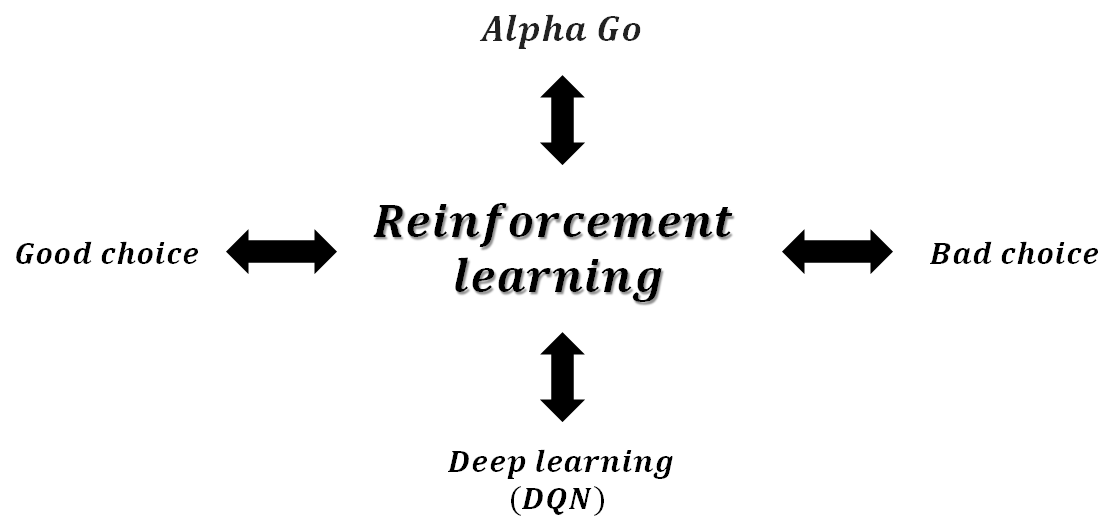




# **Gym?**

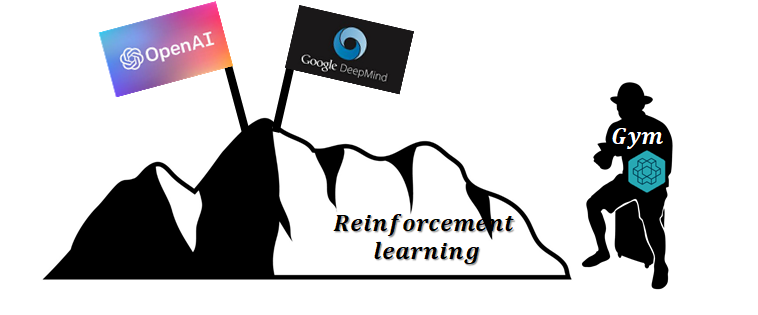

# **강화학습의 기본구조**

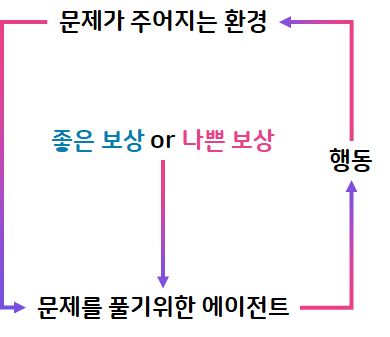

# **강화학습의 성장**
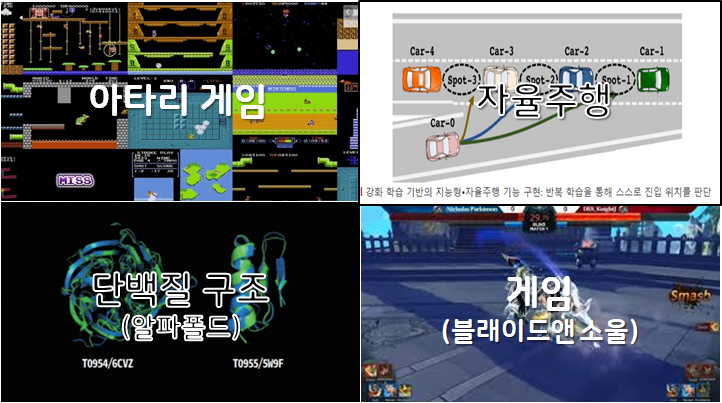

# MountainCar - V0 그리고 환경 구축
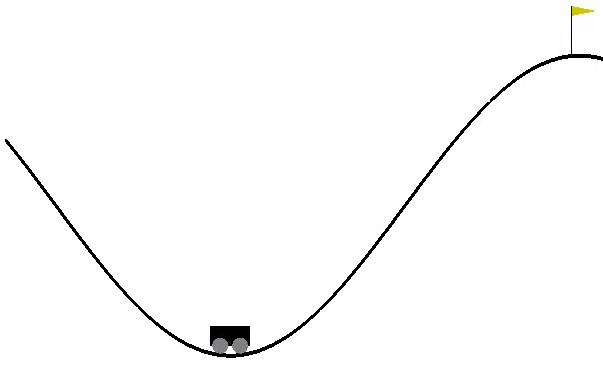 

## 두 바퀴가 달린 자동차(에이전트)로 언덕을 오르는(환경) 문제
* 보상은 각 시간단위(time step)마다 -1의 보상(음수의 보상).   
  * 보상이 음수이기에 에피소드를 빨리 끝낼수록 한 에피소드에 얻는 보상의 총     합이 커지기 때문에 
 ##### -100 보다는 -99가 더 좋은 보상이 됩니다. 

* 오른쪽의 깃발에 도달하면 하나의 에피소드가 종료. 
 * 에피소드란?  에이전트가 하나의 강화학습 환경을 완료할 때까지의 
  ##### 시간단위의 묶음을 의미합니다. 
  ##### 에피소드가 끝나면 환경은 리셋, 에이전트는 첫 시작 상태로 전환.

 
### 가장 짧은 시간내에 언덕을 올라가야 한다! 


# 환경에 필요한 라이브러리들 설치

In [ ]:
!pip install gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg

!apt-get update
!apt-get install cmake
!pip install --upgrade setuptools
!pip install ez_setup
!pip install gym[atari]

!pip install box2d-py
!pip install gym[Box_2D]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,280 kB of archives.
After this operation, 7,682 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 1,280 kB in 1s (952 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 144556 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking 

In [ ]:
import gym
import random
import tensorflow as tf
import numpy as np

# gym.make()를 활용한 '환경 구축' 
# 이렇게 생성되는 환경은 'env'라는 변수에 넣어서 계속 활용할 수 있도록 한다. 
env = gym.make('MountainCar-v0')

# 환경에 대한 정보를 파악하자! 

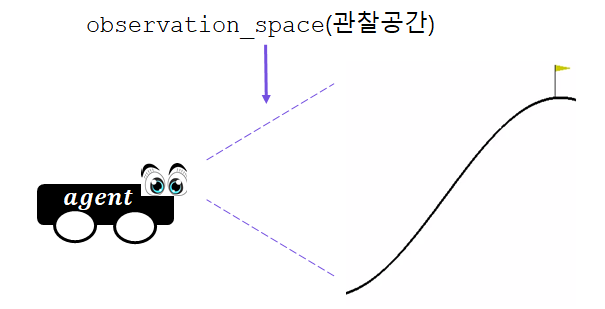

## observation_space : 관찰공간 
  * 에이전트가 환경을 볼 수 있는 '작은 창' 입니다. 
  * 에이전트는 이 관찰공간을 통해서만 환경의 정보를 파악할 수 있음. 
  * '관찰 공간'에 대한 정보는 모든 환경에서 최우선적으로 파악. 
  *  Box(2,) 출력
   * 관찰공간은 **2개의 숫자**로 구축(각 최댓값과 최솟값으로 이뤄짐)

In [ ]:
print(env.observation_space)

Box(2,)


##  관찰공간의 종류 : X 축 좌표, 에이전트의 속도 
##  행동 가능 수 : 3개(0, 1, 2) 
##  에피소드의 최대 스텝 수 : 200 step 
* 200스텝이 되는 순간 종료 

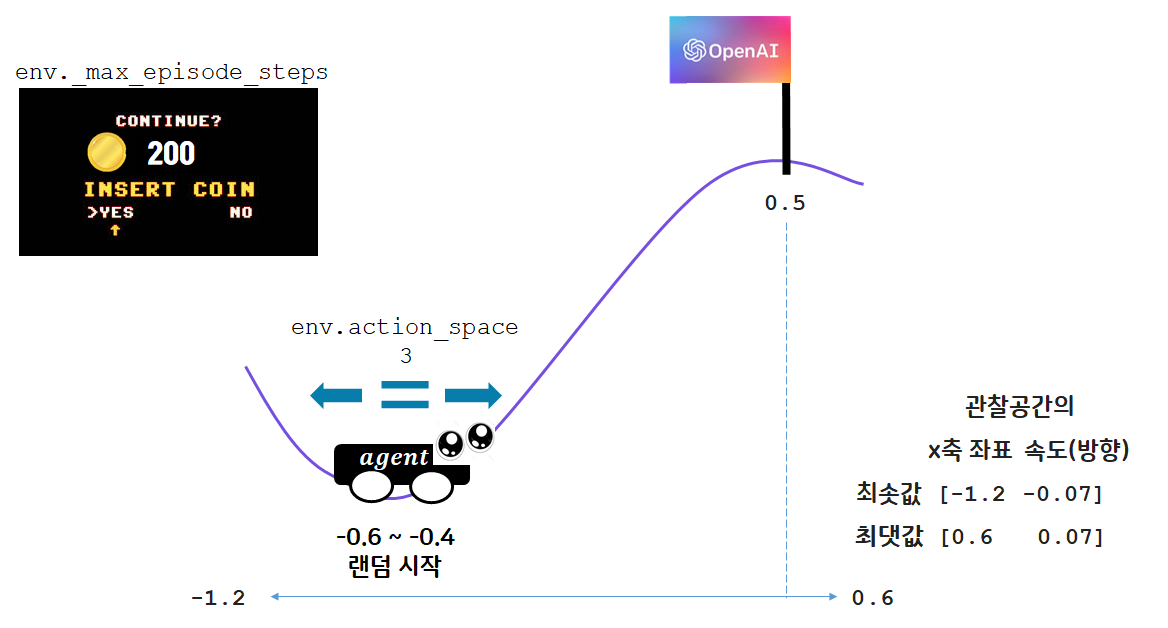

In [ ]:
print(env.observation_space.low)
print(env.observation_space.high)
print()
print(env.action_space)
print()
print(env._max_episode_steps)

[-1.2  -0.07]
[0.6  0.07]

Discrete(3)

200


## 무작위로 수행한 에이전트

 * 본격적인 학습에 들어가기 전에 랜덤한 행동을 하는 에이전트를 투입해 보는것은 환경이 어떻게 되어 있는지 
가볍게 파악하고 학습전략을 구축하는데 도움

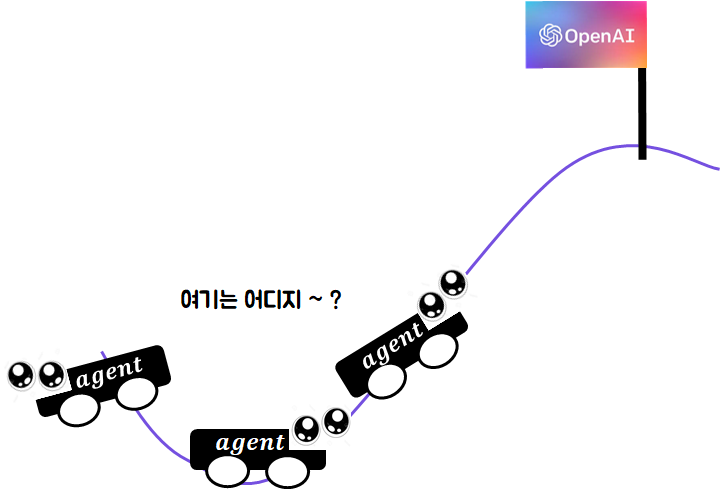

In [ ]:
# step, score 초기화
step = 0
score = 0
# 환경 초기화 
env.reset()

# 무한의 반복문 
while True:  
    #관찰 공간 중 랜덤한 값을 반환
    action = env.action_space.sample()  
    
    # 환경에 에이전트가 행동을 전달함과 동시에 시간 단위가 흐름
    # 환경이 영향을 받아서 바뀐 관찰 상태(obs), 보상(reward), 에피소드 종료 여부(done), 기타정보(info) 반환 
    obs, reward, done, info = env.step(action) 
    
    # 한 스텝마다의 score 출력
    print(score)

    # 보상 누적
    score += reward

    # 스텝 추가
    step += 1
    
    # 만약 종료여부가 True라면 break
    if done:
        break
# 마지막 최종 스코어와 스텝 수 확인
print('score:', score)
print('step:', step)

0
-1.0
-2.0
-3.0
-4.0
-5.0
-6.0
-7.0
-8.0
-9.0
-10.0
-11.0
-12.0
-13.0
-14.0
-15.0
-16.0
-17.0
-18.0
-19.0
-20.0
-21.0
-22.0
-23.0
-24.0
-25.0
-26.0
-27.0
-28.0
-29.0
-30.0
-31.0
-32.0
-33.0
-34.0
-35.0
-36.0
-37.0
-38.0
-39.0
-40.0
-41.0
-42.0
-43.0
-44.0
-45.0
-46.0
-47.0
-48.0
-49.0
-50.0
-51.0
-52.0
-53.0
-54.0
-55.0
-56.0
-57.0
-58.0
-59.0
-60.0
-61.0
-62.0
-63.0
-64.0
-65.0
-66.0
-67.0
-68.0
-69.0
-70.0
-71.0
-72.0
-73.0
-74.0
-75.0
-76.0
-77.0
-78.0
-79.0
-80.0
-81.0
-82.0
-83.0
-84.0
-85.0
-86.0
-87.0
-88.0
-89.0
-90.0
-91.0
-92.0
-93.0
-94.0
-95.0
-96.0
-97.0
-98.0
-99.0
-100.0
-101.0
-102.0
-103.0
-104.0
-105.0
-106.0
-107.0
-108.0
-109.0
-110.0
-111.0
-112.0
-113.0
-114.0
-115.0
-116.0
-117.0
-118.0
-119.0
-120.0
-121.0
-122.0
-123.0
-124.0
-125.0
-126.0
-127.0
-128.0
-129.0
-130.0
-131.0
-132.0
-133.0
-134.0
-135.0
-136.0
-137.0
-138.0
-139.0
-140.0
-141.0
-142.0
-143.0
-144.0
-145.0
-146.0
-147.0
-148.0
-149.0
-150.0
-151.0
-152.0
-153.0
-154.0
-155.0
-156.0
-157.0
-158.0


# 동영상 수행 환경 코드
 * 이후 코렙 가상환경에 video 폴더와 함께 생성 

In [ ]:
#필요한 라이브러리
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) 
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

# 영상 출력 셋팅 
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    
def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env
  
from pyvirtualdisplay import Display

#영상 크기 지정 및 출력 
display = Display(visible=0, size=(1400, 900))
display.start()

# 랜덤 행동 에이전트의 환경 실행 결과 확인
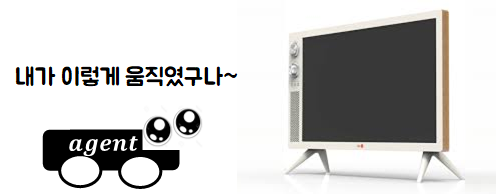

In [ ]:
# 다시한번 같은 코드 수행
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)

#환경 종료
env.close()
#비디오 출력
show_video()

score: -200.0
step: 200


# 학습데이터 생성을 위한 성공적인 에피소드 저장
* 기존 결승점을 통과해야만 받을 수 있는 보상기준을 완화
* 성능이 조금이나마 좋은 데이터를 학습데이터로 전환 



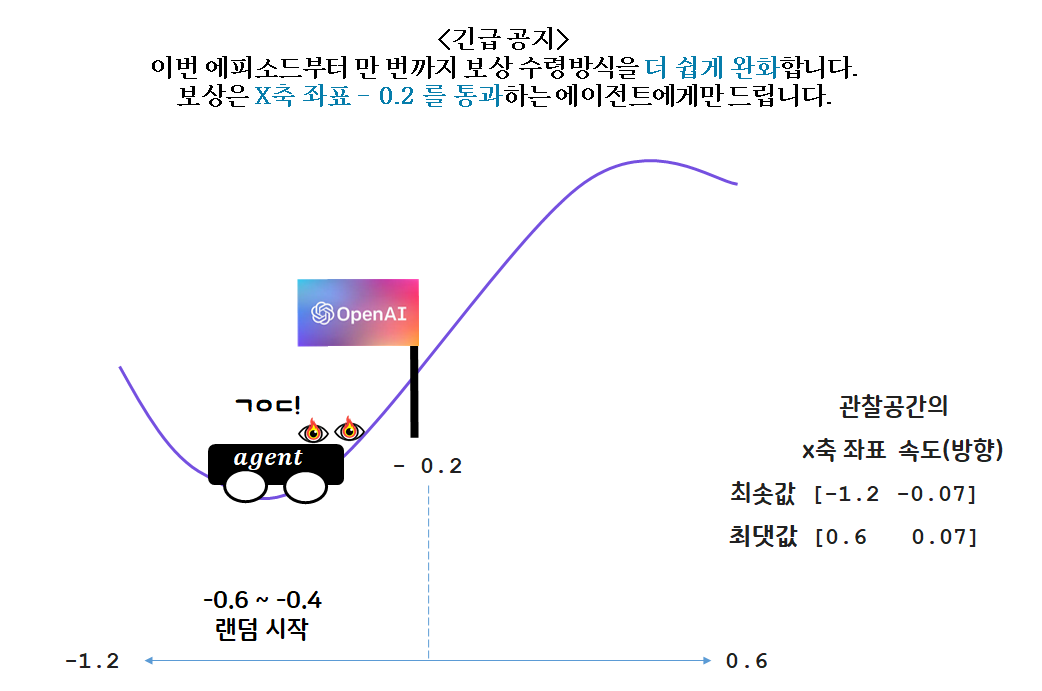

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
-199.9134
[-178.0, -190.0, -186.0, -166.0, -178.0, -182.0, -184.0, -196.0, -188.0, -166.0, -174.0, -184.0, -176.0, -168.0, -164.0, -188.0, -176.0, -180.0, -194.0, -182.0, -168.0, -194.0, -194.0, -184.0, -152.0, -184.0, -166.0, -192.0, -186.0, -186.0, -182.0, -176.0, -186.0, -176.0, -172.0, -186.0, -188.0, -174.0, -186.0, -174.0, -188.0, -174.0, -188.0, -180.0]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


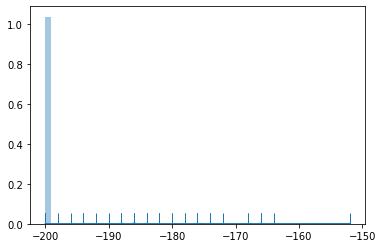

In [ ]:
# 환경 구축 및 에피소드 수행 환경 구축-------------------------------------------------------------------- #    
env = gym.make('MountainCar-v0')
scores = []
training_data = []
accepted_scores = []

#필요 충족 스코어 (이후 설명)
required_score = -198

# 1만번의 에피소드
for i in range(10000):
    # 100번의 에피소드가 끝날 때 마다 출력
    if i % 1000 == 0:
        print(i)
    # 에피소드의 종료마다 환경 리셋
    env.reset()
    # 점수 리셋
    score = 0

# 보상 기준 수정 : 기존 → 결승점 통과시 +1 , 수정 → 조금이나마 앞으로 간 경우 +1
# 성능이 나아진 데이터로 학습데이터 생성  --------------------------------------------------------------------- #  
    game_memory = []
    # 이전 관찰공간 
    previous_obs = []
    # 무한의 반복 시작
    while True:
        # 시작은 랜덤한 관찰공간 할당 
        action = env.action_space.sample()
        # 움직임에 따른 정보 저장 
        obs, reward, done, info = env.step(action)
        

        # 만약 이전 관찰 공간이 0보다 크다면, 즉 두 번째 스텝부터,  
        if len(previous_obs) > 0:
            # 이전 스텝의 행동을 game_memory에 저장  
            game_memory.append([previous_obs, action])
        
        # 관찰 공간(obs)의 값을 이전 관찰공간(previous_obs)에 저장
        # why? 한번의 스텝이 지났으니까
        previous_obs = obs

        # 다음 스텝 - 관찰 상태의 첫 번째는 X좌표(obs[0])
        # 만약, X 좌표가 -0.2보다 클 경우, 이전 스텝보다 앞(오른쪽)으로 간 경우
        # 목표에 조금이라도 가까워졌다면!  
        if obs[0] > -0.2:
            # 1 보상 
            reward = 1
        # 보상 점수 누적
        score += reward
        
        if done:
            break
    # 에피소드마다의 점수(score)를 scores에 저장 
    scores.append(score)

    # 만약 요구되는 스코어(-198점)보다 값이 높다면 즉, 3번 이상 -0.2 보다 큰 X좌표값을 기록했을 경우,
    if score > required_score:
      # score를 accepted_scores에 추가 
        accepted_scores.append(score)
        # 조금이나마 성능이 개선된 정보를 학습데이터(training_data)에 저장 
        for data in game_memory:
            training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

# 시각화 코드 ------------------------------------------------------------ #  

import seaborn as sns
#rug = True로 설정하면 각 데이터 포인트 하나하나를 바닥에 깔린 작은 선으로 표시합니다.
sns.distplot(scores, rug = True)

In [ ]:
# 확인 ( x축 좌표 , 속도 , 행동 )
training_data[:10]

[[array([-0.40471756, -0.00188607]), 0],
 [array([-0.40847646, -0.0037589 ]), 2],
 [array([-0.41208171, -0.00360525]), 0],
 [array([-0.41750783, -0.00542611]), 1],
 [array([-0.42371626, -0.00620843]), 2],
 [array([-0.42966265, -0.00594639]), 1],
 [array([-0.43630427, -0.00664162]), 1],
 [array([-0.44359314, -0.00728887]), 0],
 [array([-0.45247632, -0.00888317]), 1],
 [array([-0.46188887, -0.00941255]), 0]]

#관찰 상태(x)와 행동(y)을 통한 훈련 데이터 생성 
 * reshape함수를 활용하여 정리 

In [ ]:
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

(8756, 2)
(8756, 1)


# 분류를 위한 신경망 정의
 * 분류를 선택한 이유는 행동선택 기준이 0,1,2 중 하나를 택해야 하기 때문 
 * 마지막 계층의 units 값은 몇 개의 움직임을 가지고 있냐에 따라 수정

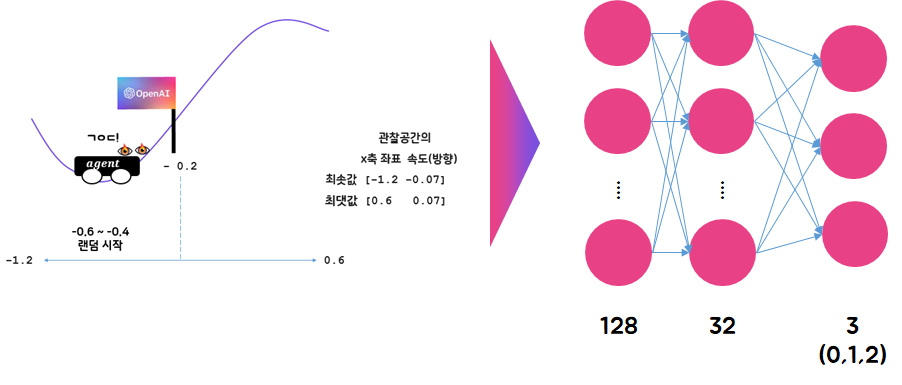

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습 수행 

In [ ]:
history = model.fit(train_X, train_Y, epochs=30, batch_size=16, validation_split=0.25)

Epoch 1/30
411/411 [==============================] - 1s 3ms/step - loss: 1.0988 - accuracy: 0.3434 - val_loss: 1.0987 - val_accuracy: 0.3623
Epoch 2/30
411/411 [==============================] - 1s 2ms/step - loss: 1.0969 - accuracy: 0.3595 - val_loss: 1.0946 - val_accuracy: 0.3568
Epoch 3/30
411/411 [==============================] - 1s 2ms/step - loss: 1.0940 - accuracy: 0.3789 - val_loss: 1.0917 - val_accuracy: 0.3563
Epoch 4/30
411/411 [==============================] - 1s 2ms/step - loss: 1.0894 - accuracy: 0.3888 - val_loss: 1.0894 - val_accuracy: 0.3856
Epoch 5/30
411/411 [==============================] - 1s 2ms/step - loss: 1.0869 - accuracy: 0.3981 - val_loss: 1.0869 - val_accuracy: 0.3833
Epoch 6/30
411/411 [==============================] - 1s 2ms/step - loss: 1.0861 - accuracy: 0.3979 - val_loss: 1.0902 - val_accuracy: 0.3709
Epoch 7/30
411/411 [==============================] - 1s 2ms/step - loss: 1.0867 - accuracy: 0.4003 - val_loss: 1.0864 - val_accuracy: 0.3847
Epoch 

# 학습결과 시각화

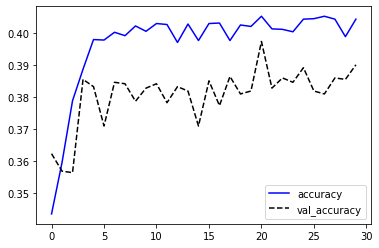

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.legend()
plt.show()

# 신경망을 활용한 에이전트 행동 선택 (시간 소모 ↑)
 * 500번의 에피소드 수행

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#이전 코드와 동일
scores = []
steps = []
actions = []

# 500번의 에피소드 수행
for i in range(100):
    if i % 10 == 0:
        print(i)
    score = 0
    step = 0
    previous_obs = []
    env.reset()
 

    while True:
        #만약 이전 행동값이 0 이라면 즉, 첫 번째 스텝인 경우 
        if len(previous_obs) == 0:
          # 랜덤하게 행동 수행
            action = env.action_space.sample()
        #두 번째 스텝 이후 ~ 
        else:
            # 이전 관찰상태를 통해 다음 관찰 상태를 예측
            # 이러한 예측을 통한 값을 바탕으로 움직임 채택
            logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
            # 출력값인 logit값 중 가장 큰 인덱스 값을 action에 저장
            action = np.argmax(logit)
            #행동 정보를 저장
            actions.append(action)
        
        #행동 수행  
        obs, reward, done, info = env.step(action)
        previous_obs = obs
        score += reward
        step += 1

        if done:
            break
    
    scores.append(score)
    steps.append(step)

0
10
20
30
40
50
60
70
80
90


# socre, step 분포 확인 

-130.03


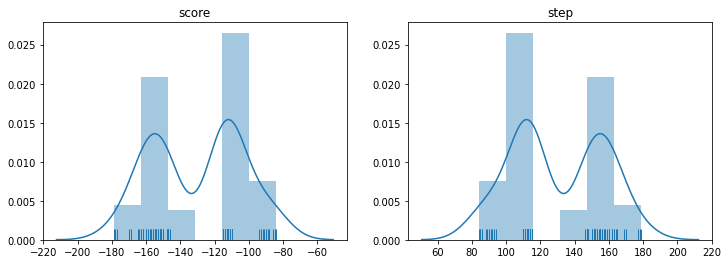

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

# 행동 분포 확인 

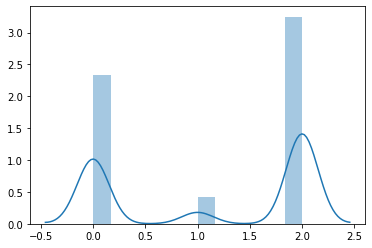

In [ ]:
sns.distplot(actions)

# 신경망을 통해 학습한 자동차 영상
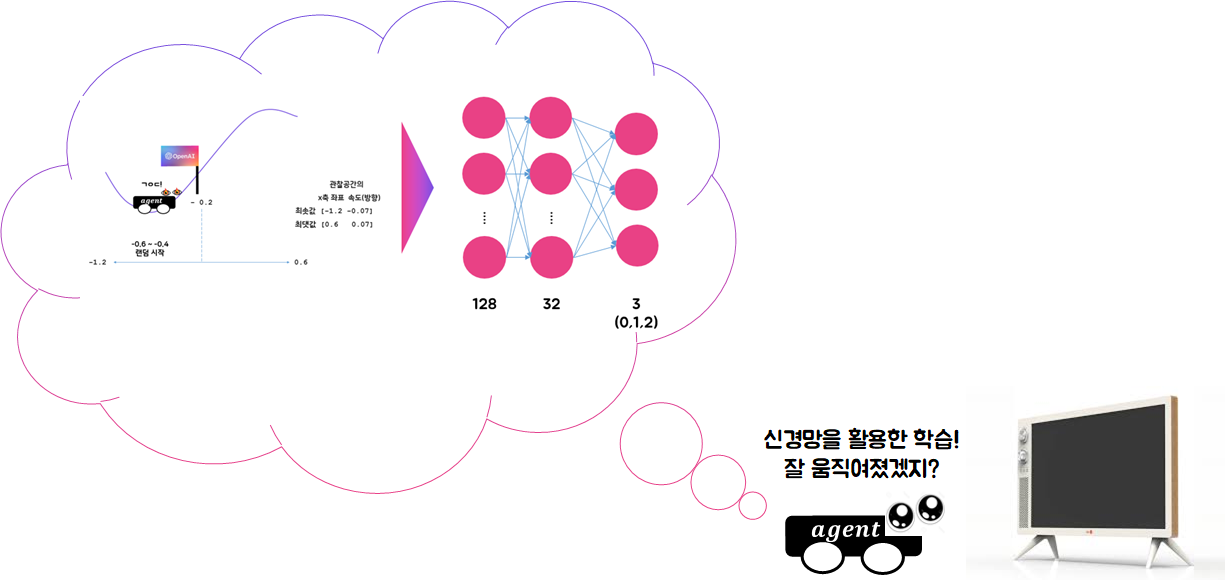

In [ ]:
env.close()
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
previous_obs = []
while True:
    if len(previous_obs) == 0:
        action = env.action_space.sample()
    else:
        logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
        action = np.argmax(logit)
    
    obs, reward, done, info = env.step(action)
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: -89.0
step: 89


# 행동이 정수가 아닌 실수로 전환
 * 행동이 실수이기에 더 어려워진 난이도
 * 이렇게 어려위진 행동인 경우에도 과연 신경망으로 문제를 풀 수 있을지에 대한 실험 

In [ ]:
env = gym.make('MountainCarContinuous-v0')

print('*'*10,'환경 공간','*'*10)
print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high)

print('*'*10,'에이전트의 움직임','*'*10)
print(env.action_space)
print(env.action_space.low)
print(env.action_space.high)

print('*'*10,'최대 수행 움직임','*'*10)
print(env._max_episode_steps)

********** 환경 공간 **********
Box(2,)
[-1.2  -0.07]
[0.6  0.07]
********** 에이전트의 움직임 **********
Box(1,)
[-1.]
[1.]
********** 최대 수행 움직임 **********
999


# 랜덤 행동 에이전트의 환경실행 결과 확인 (200 스텝)
 * score : 각 스텝마다 얻는 보상은 행동의 제곱에 0.1을 곱한값의 음수값.
   ###### (큰 힘으로 움직일 수록 음의 보상을 더 많이 얻게되는 구조)
 * 깃발에 도달하면 +100점
 * 깃발에 도달하지 않고 움직이지 않으면 0점  

In [ ]:
env.reset()
score = 0
step = 0
    
for i in range(200):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    previous_obs = obs
    score += reward
    step += 1

    if done:
        break
        
print(score, step)

-6.636531395889686 200


# 랜덤 행동 에이전트의 환경실행 결과 확인 (999 스텝)


In [ ]:
env.reset()
score = 0
step = 0
    
while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    previous_obs = obs
    score += reward
    step += 1

    if done:
        break
        
print(score, step)

-33.536830934525895 999


# 랜덤 행동에서 성공한 케이스를 학습 데이터로 저장('실수'인 움직임)
 * 보상 체계도 다시 제대로 움직이면 1점 그렇지 못하면 -1점 
 * 달라진 점은 움직임의 값이 정수가 아닌 실수로 전환


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
-199.868
[-174, -196, -186, -184, -188, -176, -186, -170, -182, -168, -196, -182, -184, -186, -192, -168, -178, -192, -190, -174, -184, -184, -196, -194, -188, -162, -186, -180, -176, -186, -176, -192, -190, -196, -188, -164, -164, -172, -188, -188, -178, -190, -182, -190, -178, -196, -180, -180, -194, -196, -170, -190, -184, -190, -178, -188, -190, -190, -164, -176, -172, -192, -180, -178, -184, -172, -176, -176, -186, -180, -182, -184, -168, -190, -174]


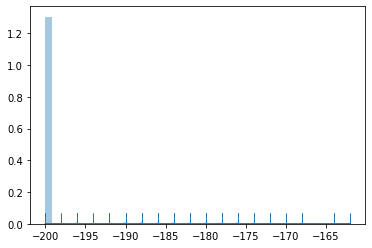

In [ ]:
scores = []
training_data = []
accepted_scores = []
required_score = -198

for i in range(10000):
    if i % 100 == 0:
        print(i)
    env.reset()
    score = 0
    game_memory = []
    previous_obs = []
    
    for i in range(200):
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        
        if len(previous_obs) > 0:
            game_memory.append([previous_obs, action])
        
        previous_obs = obs
        if obs[0] > -0.2:
            reward = 1
        else:
            reward = -1
        
        score += reward
        
        if done:
            break
        
    scores.append(score)
    if score > required_score:
        accepted_scores.append(score)
        for data in game_memory:
            training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

import seaborn as sns
sns.distplot(scores, rug=True)

# 행동값이 '실수'인 경우의 신경망 문제 해결 결과 영상 (시간 소모 ↑)

In [ ]:
#학습데이터 구축 과정 
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

#모델 설계 과정 - 메인 활성화함수 'Elu' 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(1, activation='linear')
])

#컴파일 과정 
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

# 학습 
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

(14925, 2)
(14925, 1)
Epoch 1/10
350/350 [==============================] - 1s 2ms/step - loss: 0.3382 - val_loss: 0.3305
Epoch 2/10
350/350 [==============================] - 1s 2ms/step - loss: 0.3366 - val_loss: 0.3292
Epoch 3/10
350/350 [==============================] - 1s 2ms/step - loss: 0.3363 - val_loss: 0.3271
Epoch 4/10
350/350 [==============================] - 1s 2ms/step - loss: 0.3357 - val_loss: 0.3280
Epoch 5/10
350/350 [==============================] - 1s 2ms/step - loss: 0.3351 - val_loss: 0.3279
Epoch 6/10
350/350 [==============================] - 1s 2ms/step - loss: 0.3347 - val_loss: 0.3277
Epoch 7/10
350/350 [==============================] - 1s 2ms/step - loss: 0.3343 - val_loss: 0.3267
Epoch 8/10
350/350 [==============================] - 1s 2ms/step - loss: 0.3341 - val_loss: 0.3273
Epoch 9/10
350/350 [==============================] - 1s 2ms/step - loss: 0.3350 - val_loss: 0.3284
Epoch 10/10
350/350 [==============================] - 1s 2ms/step - loss: 0.3

In [ ]:
# 학습결과를 통한 에이전트의 움직임 결정
env.close()
env = wrap_env(gym.make('MountainCarContinuous-v0'))
env.reset()

score = 0
step = 0
previous_obs = []
while True:
    if len(previous_obs) == 0:
        action = env.action_space.sample()
    else:
        action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
    
    obs, reward, done, info = env.step(action)
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: -1.3697938069474247
step: 999


# Q-러닝을 활용한 문제풀이
* Q-러닝은 관찰 상태에서 취할 수 있는 모든 행동의 Q값(품질)을 학습하는 방식
* 특정 상태에서 어떤 행동의 Q값이 다른 행동보다 높다면 Q값이 높은 행동을 우선적으로 선택
* Q값이 높으면 선택될 확률 증가
* 모든 상태에 대한 모든 행동의 Q값을 구하면 테이블 형태의 데이터 획득 (Q-Table)
  * Q-Table 학습 과정이 'Q-Learning'

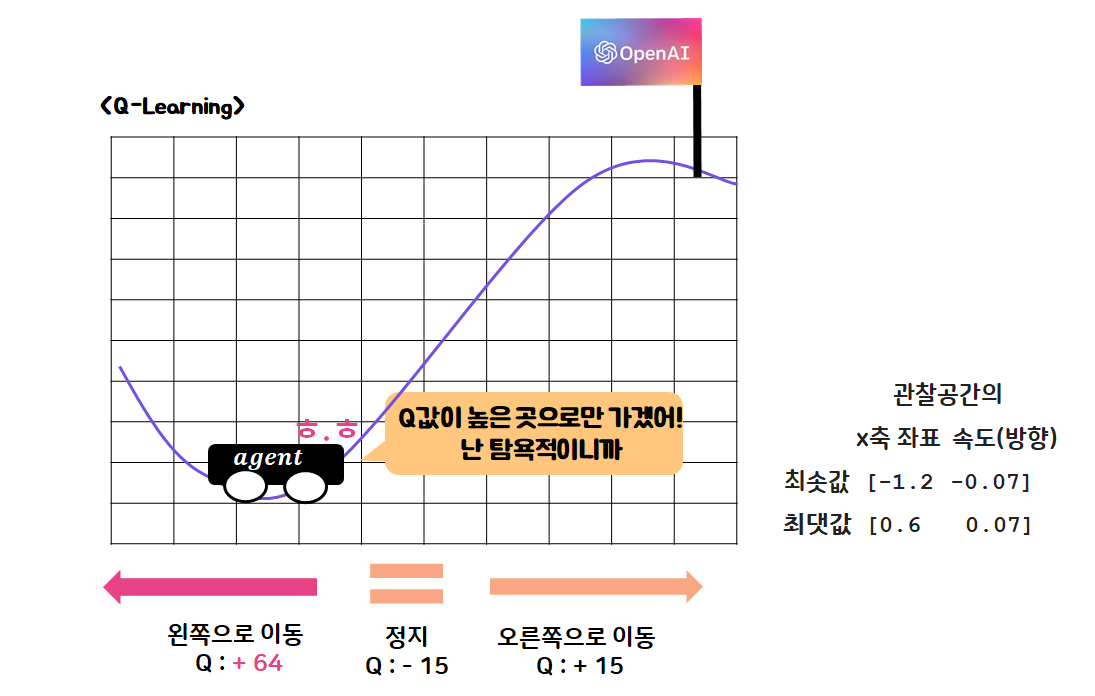

* 행동공간을 일정한 간격의 격자로 나눠서 해당 격자에 대한 Q값을 계산

# 관찰 공간과 행동 공간의 격자화 
 
 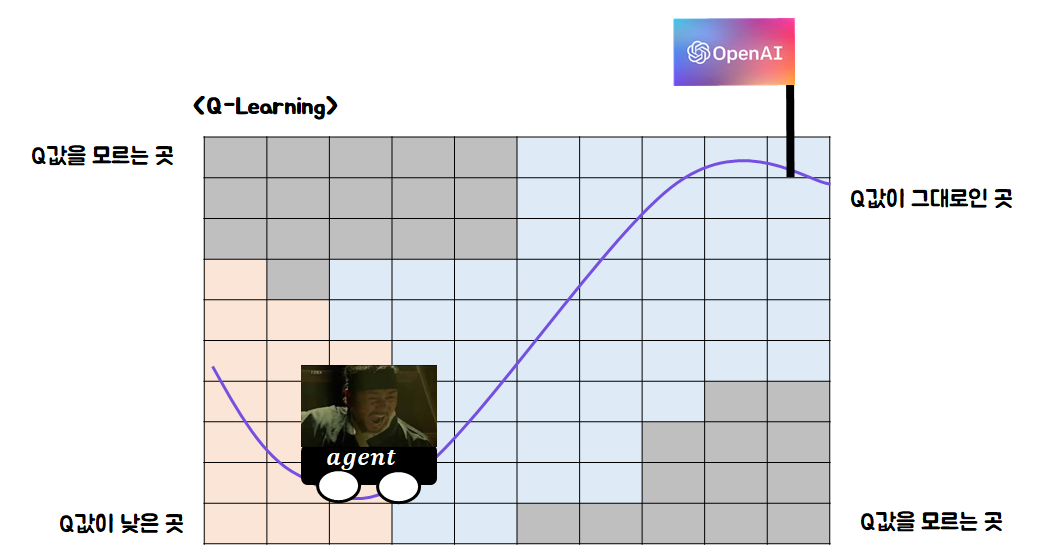
- Q-Table 변수에 3차원의 Q-Table을 저장. 관찰공간이 2차원이고, 그 안에 모든 행동의 Q값을 넣어야 하기 때문에 3차원 Q-Table이 만들어 짐
- 관찰 공간은 10개의 격자로 나눴고, 행동공간은 6개의 격자로 나눔 
  - 그럼 관찰공간의 크기는 10*10 즉 100, 행동은 6개이기 때문에 Q-Table에 저장되는 Q값은 총 600개 

* 처음에는 각 행동의 Q값이 어떤 값인지 알 수 없기 때문에 초기화 과정 수행          
   * 기본값으로는 0과 비슷하고 무시할 수 있을 정도의 작은 값을 넣어줍니다. 
   * 모두 같은 값을 넣어주기 때문에 처음에는 큐테이블을 참조해도 랜덤한 행동이 선택

* 해당 행동이 효과적이지 않다고 판단되어 Q값이 조금 떨어지면 나머지 q값이 그대로 유지되고 있기 때문에 다른 행동으로 탐색할 확률이 증가 
   * 초기 q값을 높게 줄 수록 처음에 시도했던 행동이 효과적이지 않을 때 다른 행동을 탐색해볼 확률이 높아짐 

* 행동은 -1과 1 사이의 6개 값이 출력 
* 이 값에 의해 에이전트는 어떻게 움직일지 결정 

In [ ]:
# 환경 상태의 격자 생성
state_grid_count = 10
# 격자당 카운트
action_grid_count = 6

q_table = []
for i in range(state_grid_count):
    q_table.append([])
    for j in range(state_grid_count):
        q_table[i].append([])
        for k in range(action_grid_count):
            q_table[i][j].append(1e-4)
            
actions = range(action_grid_count)
actions = np.array(actions).astype(float)
actions *= ((env.action_space.high - env.action_space.low) / (action_grid_count - 1))
actions += env.action_space.low

print(actions)

[-1.         -0.59999999 -0.19999999  0.20000002  0.60000002  1.00000003]


# Q러닝을 에이전트를 학습시키기 위한 함수 정의 
- obs_to_state () : 관찰상태를 격자에 배당
- softmax() : 개선식 

In [ ]:
import random
def obs_to_state(env, obs):
    obs = obs.flatten()
    low = env.observation_space.low
    high = env.observation_space.high
    idx = (obs - low) / (high - low) * state_grid_count
    idx = [int(x) for x in idx]
    return idx

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    sum_exp_logits = np.sum(exp_logits)
    return exp_logits / sum_exp_logits

# Q-LEARNING 에이전트 학습 
 
* 이 코드에서는 행동을 선택할 때 강화학습에서 널리 쓰이는 방법 중 하나인 엡실론-탐욕 이라는 정책을 사용합니다. 
 * 엡실론 탐욕 정책은 엡실론이라는 값보다 난수가 작을 때는 랜덤한 행동을 사용하고, 그렇지 않으면 지금까지 
찾은것 중에서 가장 좋은 방법을 선택. 즉, 처음에는 큰 값으로 설정하고 학습을 지속함에 따라 점점 작아지도록 설정. 

* ***이 코드에서 제일 중요한 부분은 바로 여기 큐테이블의 학습 공식에 대한 부분.***

* 관찰 상태와 행동이 주어졌을 때 우리는 Q 값을 알 수 있습니다. 
* 이것을 입력이 주어졌을 때 출력값을 구할 수 있는 관계로 생각하면, 모든 상태와 행동에 대한 Q 값을 구하는 과정은 일반적인 큐 함수를 구하는 과정이라고 할 수 있습니다. 
* 큐 함수를 수식으로는 Q(s,a)로 쓰게 되죠. 여기서 s는 상태를 나타내고, a는 행동을 나타냅니다.

* 어떤 상태의 큐함수를 구하려면 현재 가치와 미래 가치를 모두 고려해야 합니다. 현재 가치는 현재의 큐 함수 값이기 때문에 Q(s,a) 입니다. 
* 미래 가치는 각 스텝마다 받는 보상과 행동의 결과로 바뀐 다음 상태에서 얻을 수 있는 큐 함수의 값이 됩니다. 
* 이걸 수식으로 바꿔보면 ***𝑄(𝑠,𝑎) ≅𝑅+𝑄(𝑠′, 𝑎′)*** 이렇게 되죠. 
 * 여기서 𝑅은 현재 행동으로 받는 보상, 𝑅바로 다음에 있는 Q함수는 다음 상태의 다음 행동에 대한 큐함수값으로 미래에 받을 보상의 추정치. 

 * 그런데 미래에 받을 보상은 현재보다 가치는 낮다고 생각할 수 있음. 따라서 미래 보상에는 감가율 이라는 값을 곱하게 됩니다. 

 * 감가율은 보통 0이상 1이하이며, 감마라는 기호로 표시하죠. 


* ***𝑄(𝑠,𝑎) ≅𝑅+γ𝑄(𝑠′, 𝑎′)*** 그런데 우리가 고려하는 에이전트가 학습을 통해 최적의 행동을 한다고 가정하면 취할수 있는 행동 중 Q 함수의 값이 제일 높은 행동을 하게 됩니다. 따라서 다음 상태에서 모든 행동에 대한 큐함수의 값을 고려할 필요 없이 큐 함수의 최댓값인 m𝑎𝑥𝑄(𝑠′, 𝑎′) 만 계산하면 됩니다. 
 ***𝑄(𝑠,𝑎) ≅𝑅+γ𝑚𝑎𝑥𝑄(𝑠′, 𝑎′)***

* 이제 𝑄(𝑠,𝑎) 값이 𝑅+γ𝑚𝑎𝑥𝑄(𝑠′, 𝑎′) 에 가까워 지게 하면 됩니다. 

 * 바로 여러개의 값을 얻은 후 평균을 내면 평균의 특성상 원하는 값에 좀 더 가까워 지게 됩니다. 
 * 즉 처음에 𝑄(𝑠,𝑎) 를 구하고, 2개의 𝑄(𝑠,𝑎)를 구했다면 모두 더한 합을 n으로 나누는 거죠. 
 * 그래서 이러한 방식을 통해 ***𝑄(𝑠,𝑎) ≅𝑄(𝑠,𝑎)+α(𝑅+γ𝑚𝑎𝑥𝑄(𝑠^′, 𝑎^′ )−𝑄(𝑠,𝑎))*** 라는 수식을 완성 
 * 여기 α는 신경망의 학습률과 같은 역할을 수행하는 존재로서 학습이 잘 될 수 있도록 조절을 수행합니다. 


 


In [ ]:
max_episodes = 10000
scores = []
steps = []
select_actions = []

learning_rate = 0.05
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01

for i in range(max_episodes):
    epsilon *= 0.9
    epsilon = max(epsilon_min, epsilon)
    
    if i % 100 == 0 and i != 0:
        print(i, 'mean score: {}, mean step: {}, epsilon: {}'.format(np.mean(scores[-100:]), np.mean(steps[-100:]), epsilon))
        
    previous_obs = env.reset()
    score = 0
    step = 0
    
    while True:
        state_idx = obs_to_state(env, previous_obs)
        if random.random() < epsilon:
            action_idx = random.randint(0, action_grid_count-1)
            action = actions[action_idx]
        else:
            logits = q_table[state_idx[0]][state_idx[1]]
            action_idx = np.argmax(softmax(logits))
            action = actions[action_idx]
        
        obs, reward, done, info = env.step([action])
        previous_obs = obs
        score += reward
        reward -= 0.05
        step += 1
        
        select_actions.append(action)
        
        new_state_idx = obs_to_state(env, obs)
        
        q_table[state_idx[0]][state_idx[1]][action_idx] = \
            q_table[state_idx[0]][state_idx[1]][action_idx] + \
            learning_rate * (reward + gamma * np.amax(q_table[new_state_idx[0]][new_state_idx[1]]) - q_table[state_idx[0]][state_idx[1]][action_idx])
        
        if done:
            break
    
    scores.append(score)   
    steps.append(step)
    
    if np.mean(scores[-100:]) >= 90:
        print('Solved on episode {}!'.format(i))
        break

100 mean score: 1.9808791712475269, mean step: 882.14, epsilon: 0.01
200 mean score: 74.50663929464584, mean step: 556.62, epsilon: 0.01
300 mean score: 87.28027928702353, mean step: 514.73, epsilon: 0.01
400 mean score: 87.90651930768966, mean step: 505.05, epsilon: 0.01
500 mean score: 87.96615930941341, mean step: 502.86, epsilon: 0.01
600 mean score: 87.8192792987418, mean step: 506.7, epsilon: 0.01
700 mean score: 87.74287929389, mean step: 505.24, epsilon: 0.01
800 mean score: 87.90863930647133, mean step: 506.76, epsilon: 0.01
900 mean score: 87.55999928560256, mean step: 515.6, epsilon: 0.01
1000 mean score: 87.93411930734395, mean step: 506.15, epsilon: 0.01
1100 mean score: 87.94199930771589, mean step: 498.74, epsilon: 0.01
1200 mean score: 87.72427929660799, mean step: 509.57, epsilon: 0.01
1300 mean score: 87.86547930128097, mean step: 504.91, epsilon: 0.01
1400 mean score: 87.85439930363893, mean step: 499.44, epsilon: 0.01
1500 mean score: 87.63319928964374, mean step: 5

# 결과 시각화 

84.09998035889457


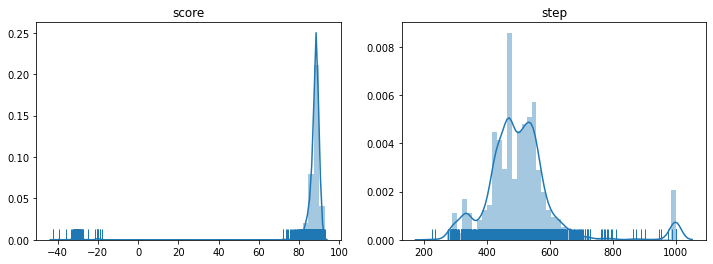

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

# 행동분포 시각화 

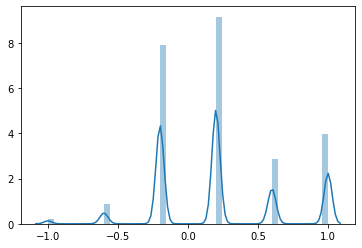

In [ ]:
sns.distplot(select_actions)

# 스코어 점수 

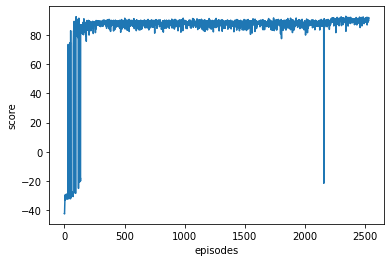

In [ ]:
plt.plot(scores)
plt.xlabel('episodes')
plt.ylabel('score')
plt.show()

# 큐테이블 시각화
* 상하좌우의 -1값은 탐색하지 못한 부분

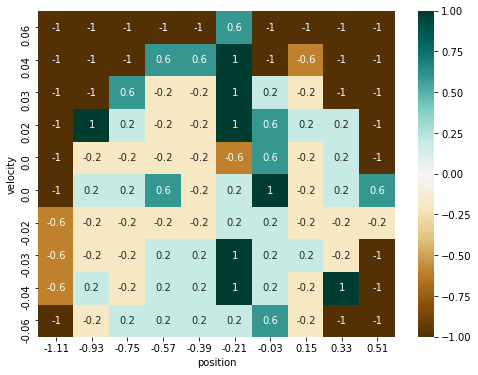

In [ ]:
q_values = []
for i in range(state_grid_count):
    q_values.append([])
    for j in range(state_grid_count):
        action_idx = np.argmax(q_table[i][j])
        q_values[i].append(actions[action_idx])

plt.figure(figsize=(8, 6))
ax = sns.heatmap(q_values, annot=True, cmap='BrBG')
ax.set_xlabel('position')
ax.set_ylabel('velocity')
xticks = env.observation_space.low[0] + range(state_grid_count+1) * abs((env.observation_space.high[0] - env.observation_space.low[0]) / state_grid_count)
xticks = [int((xticks[idx] + xticks[idx+1]) / 2 * 100) / 100 for idx, xtick in enumerate(xticks[:-1])]
ax.set_xticklabels(xticks)
yticks = env.observation_space.low[1] + range(state_grid_count+1) * abs((env.observation_space.high[1] - env.observation_space.low[1]) / state_grid_count)
yticks = [int((yticks[idx] + yticks[idx+1]) / 2 * 100) / 100 for idx, ytick in enumerate(yticks[:-1])]
ax.set_yticklabels(yticks)
ax.invert_yaxis()
plt.show()

# 큐 러닝 학습 결과

In [ ]:
env.close()
env = wrap_env(gym.make('MountainCarContinuous-v0'))

score = 0
step = 0
previous_obs = env.reset()

while True:
    state_idx = obs_to_state(env, previous_obs)
    if random.random() < epsilon:
        action_idx = random.randint(0, action_grid_count-1)
        action = actions[action_idx]
    else:
        logits = q_table[state_idx[0]][state_idx[1]]
        action_idx = np.argmax(softmax(logits))
        action = actions[action_idx]

    obs, reward, done, info = env.step([action])
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: 90.17999942064284
step: 343
